<a href="https://colab.research.google.com/github/Ru1chi/Deep_learning/blob/main/FACE_MASK_DETECTION_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!PIP INSTALL KAGGLE

/bin/bash: line 1: PIP: command not found


In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset="/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data  test3.jpg  test4.jpg  test5.jpg


### **Import the dependencies**

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')#creates a list which contains all the file names
print(with_mask_files[0:5])


['with_mask_1099.jpg', 'with_mask_79.jpg', 'with_mask_889.jpg', 'with_mask_1524.jpg', 'with_mask_330.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')#creates a list which contains all the file names
print(without_mask_files[0:5])


['without_mask_520.jpg', 'without_mask_548.jpg', 'without_mask_3150.jpg', 'without_mask_241.jpg', 'without_mask_2902.jpg']


In [9]:
len(with_mask_files)

3725

In [10]:
len(without_mask_files)

3828

### **Create the labesla for with_mask and without_mask images**

In [11]:
#create labels for each set of images
#read the file names if the name starts with with_mask as 1 and without-mask as 0
with_mask_labels=[1]*3725#creating a list and having values = to the nub of images
without_mask_labels=[0]*3828


In [12]:
with_mask_labels[0:5]

[1, 1, 1, 1, 1]

In [13]:

without_mask_labels[0:5]

[0, 0, 0, 0, 0]

In [14]:
len(without_mask_labels)

3828

In [15]:
len(with_mask_labels)


3725

In [16]:
labels=with_mask_labels+without_mask_labels#combine 2 lists
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


### **Display the images**

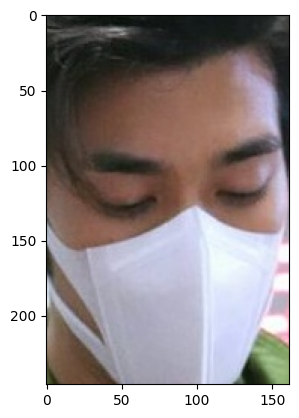

In [17]:
#now check the shape of all the images
img=mpimg.imread('/content/data/with_mask/with_mask_1099.jpg')
imgplot=plt.imshow(img)
plt.show()

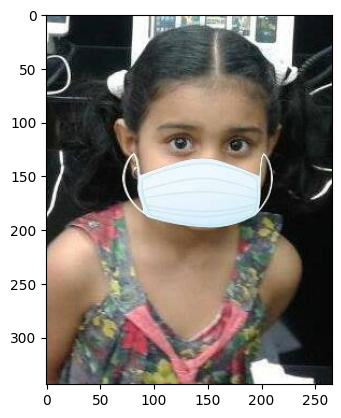

In [18]:
#now check the shape of all the images
img=mpimg.imread('/content/data/with_mask/with_mask_889.jpg')
imgplot=plt.imshow(img)
plt.show()

### **Image Processing**
### The size is not equal therefore we need to resize them
 convert the images into numpy array

---



In [19]:
with_mask_path=("/content/data/with_mask/")

data=[]

for img_file in with_mask_files:
    image=Image.open(with_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)


without_mask_path=("/content/data/without_mask/")


for img_file in without_mask_files:
    image=Image.open(without_mask_path+img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
print(len(data))
print(len(labels))

7553
7553


In [21]:
print(data[0])

[[[ 62  66  65]
  [ 51  55  54]
  [ 45  50  49]
  ...
  [ 72  72  70]
  [ 71  71  68]
  [ 72  71  67]]

 [[ 58  61  60]
  [ 46  50  49]
  [ 42  46  45]
  ...
  [ 81  81  79]
  [ 71  71  67]
  [ 68  67  63]]

 [[ 57  60  57]
  [ 55  58  55]
  [ 52  54  52]
  ...
  [ 71  71  69]
  [ 65  64  61]
  [ 63  62  58]]

 ...

 [[ 84  91  57]
  [ 72  78  44]
  [ 54  57  26]
  ...
  [146 179 118]
  [144 176 116]
  [144 175 116]]

 [[ 84  95  60]
  [ 76  86  52]
  [ 62  69  36]
  ...
  [143 178 117]
  [141 174 114]
  [142 173 114]]

 [[ 81  95  59]
  [ 74  86  51]
  [ 64  72  39]
  ...
  [143 175 115]
  [140 171 112]
  [142 173 114]]]


In [22]:
data[0].shape

(128, 128, 3)

### **Converting labels list and data list into numpy array**

In [23]:
x=np.array(data)

In [24]:
y=np.array(labels)

In [25]:
x.shape#images

(7553, 128, 128, 3)

In [26]:

y.shape#labels

(7553,)

## **Train test split**

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:

print(x_train.shape,x_test.shape,x.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (7553, 128, 128, 3)


In [29]:
#scalling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [30]:
x_train_scaled[0]

array([[[0.82745098, 0.83921569, 0.8745098 ],
        [0.82745098, 0.83921569, 0.8745098 ],
        [0.82745098, 0.83921569, 0.8745098 ],
        ...,
        [0.86666667, 0.87843137, 0.91372549],
        [0.86666667, 0.87843137, 0.91372549],
        [0.86666667, 0.8745098 , 0.91764706]],

       [[0.82745098, 0.83921569, 0.8745098 ],
        [0.82745098, 0.83921569, 0.8745098 ],
        [0.82745098, 0.83921569, 0.8745098 ],
        ...,
        [0.86666667, 0.87843137, 0.91372549],
        [0.86666667, 0.87843137, 0.91372549],
        [0.86666667, 0.8745098 , 0.91764706]],

       [[0.82745098, 0.83921569, 0.8745098 ],
        [0.82745098, 0.83921569, 0.8745098 ],
        [0.82745098, 0.83921569, 0.8745098 ],
        ...,
        [0.86666667, 0.87843137, 0.91372549],
        [0.86666667, 0.87843137, 0.91372549],
        [0.86666667, 0.8745098 , 0.91764706]],

       ...,

       [[0.43921569, 0.45098039, 0.47843137],
        [0.35686275, 0.36862745, 0.39607843],
        [0.08235294, 0

### Building a CNN network

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_class=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))#conv2D is the filter||||input_shape should be mentiones only in the first layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))



model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'))#conv2D is the filter
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))#avoid overfitting

model.add(keras.layers.Dense(62,activation='relu'))
model.add(keras.layers.Dropout(0.5))#avoid overfitting

model.add(keras.layers.Dense(num_of_class,activation='sigmoid'))





In [33]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [34]:
#training the neural network
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 19ms/step - loss: 0.4737 - acc: 0.7808 - val_loss: 0.2470 - val_acc: 0.8926
Epoch 2/5
170/170 [==============================] - 2s 14ms/step - loss: 0.2996 - acc: 0.8786 - val_loss: 0.2398 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 2s 14ms/step - loss: 0.2596 - acc: 0.8977 - val_loss: 0.2932 - val_acc: 0.8711
Epoch 4/5
170/170 [==============================] - 3s 15ms/step - loss: 0.2199 - acc: 0.9150 - val_loss: 0.2138 - val_acc: 0.9174
Epoch 5/5
170/170 [==============================] - 2s 14ms/step - loss: 0.1858 - acc: 0.9297 - val_loss: 0.1790 - val_acc: 0.9372


### **Model Evaluation**

In [35]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print("test accuracy=",accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2038 - acc: 0.9219
test accuracy= 0.9219059944152832


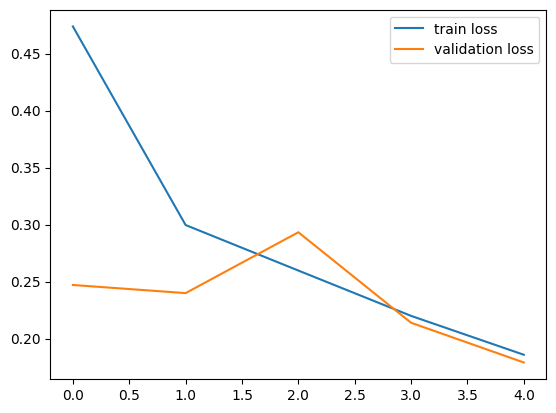

In [36]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

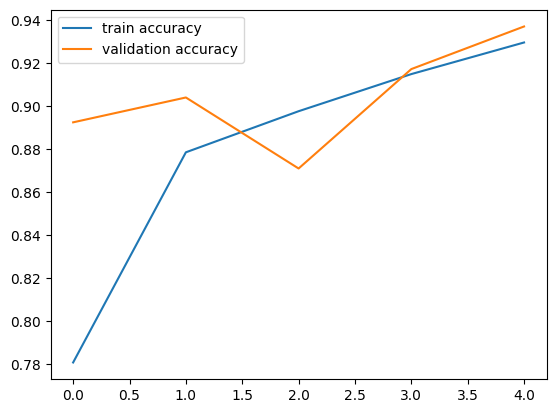

In [37]:
#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

### **Predictive System**

Path of the image to be predicted: /content/test4.jpg


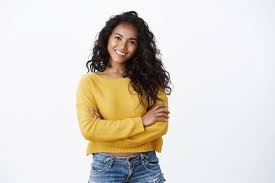

1/1 [==============================] - 0s 25ms/step
[[0.01911581 0.99925846]]
1
The person in the image is not wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test3.jpg


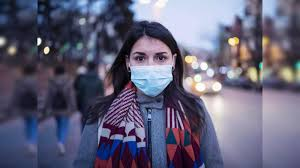

1/1 [==============================] - 0s 18ms/step
[[0.52374107 0.43778324]]
0
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')